In [2]:
import numpy as np
import gym
import random
import math
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [3]:
env = gym.make('CartPole-v0')
n_actions = env.action_space.n
n_states = env.observation_space.shape[0]
print("Action space size: ", n_actions)
print("State space size: ", n_states)

Action space size:  2
State space size:  4


In [4]:
# define the number of buckets for each state value (x, x', theta, theta')
buckets = (1, 1, 6, 12)     

# define upper and lower bounds for each state value
upper_bounds = [
        env.observation_space.high[0], 
        0.5, 
        env.observation_space.high[2], 
        math.radians(50)
        ]
lower_bounds = [
        env.observation_space.low[0], 
        -0.5, 
        env.observation_space.low[2], 
        -math.radians(50)]

In [5]:
# HYPERPARAMETERS
min_alpha = 0.1             # learning rate
min_epsilon = 0.1           # exploration rate
gamma = 1                   # discount factor
ada_divisor = 25            # decay rate parameter for alpha and epsilon

# INITIALISE Q MATRIX
Q = np.zeros(buckets + (n_actions,)) 
print(np.shape(Q))

(1, 1, 6, 12, 2)


In [6]:
def discretize(obs):
    ''' discretise the continuous state into buckets ''' 
    ratios = [(obs[i] + abs(lower_bounds[i])) / (upper_bounds[i] - lower_bounds[i]) for i in range(len(obs))]
    new_obs = [int(round((buckets[i] - 1) * ratios[i])) for i in range(len(obs))]
    new_obs = [min(buckets[i] - 1, max(0, new_obs[i])) for i in range(len(obs))]
    return tuple(new_obs)


In [7]:
def epsilon_policy(state, epsilon):
    ''' choose an action using the epsilon policy '''
    exploration_exploitation_tradeoff = np.random.random()
    if exploration_exploitation_tradeoff <= epsilon:
        action = env.action_space.sample()  # exploration
    else:
        action = np.argmax(Q[state])   # exploitation
    return action

In [8]:
def update_q(current_state, action, reward, new_state, alpha):
    ''' update the Q matrix with the Bellman equation '''
    Q[current_state][action] += alpha * (reward + gamma * np.max(Q[new_state]) - Q[current_state][action])

In [9]:
def get_alpha(t):
    ''' decrease the learning rate at each episode '''
    return max(min_alpha, min(1.0, 1.0 - math.log10((t + 1) / ada_divisor)))

In [10]:
def get_epsilon(t):
    ''' decrease the exploration rate at each episode '''
    return max(min_epsilon, min(1, 1.0 - math.log10((t + 1) / ada_divisor)))

In [11]:
def get_alpha(t):
    ''' decrease the learning rate at each episode '''
    return max(min_alpha, min(1.0, 1.0 - math.log10((t + 1) / ada_divisor)))

In [14]:
def greedy_policy(state):
    ''' choose an action using the greedy policy '''
    return np.argmax(Q[state])

In [12]:
#traning phase

rewards = [] #reward list where the reward will be store

for episode in range(1,1001): #training 1000 episodes
    # reset env
    current_state = env.reset() 
    current_state = discretize(current_state)

    alpha = get_alpha(episode) 
    epsilon = get_epsilon(episode)

    episode_rewards = 0
    done= False
    while not done: 
        # env.render()
        action = epsilon_policy(current_state, epsilon) #exploit
        #increment enviroment
        new_state, reward, done, _ = env.step(action)
        new_state = discretize(new_state)
        #update q table 
        update_q(current_state, action, reward, new_state, alpha)
        current_state = new_state

        # increment the cumulative reward
        episode_rewards += reward

    # append the episode cumulative reward to the reward list
    rewards.append(episode_rewards)
    #live update on current episode    
    if episode % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {episode}")

print("Training finished.\n")

Episode: 1000
Training finished.



In [15]:
#evaluating phase
rewards = [] 
episode = 300
sum_of_epochs = 0

for t in range(episode): 
    current_state = env.reset()
    current_state = discretize(current_state)
    episode_rewards = 0
    epochs = 0

    
    done = False 
    while not done:# while episodes not done will choose from Q table and taking action 
        #env.render()
        action = greedy_policy(current_state)
        new_state, reward, done, _ = env.step(action)
        new_state = discretize(new_state)
        episode_rewards += reward # increment the cumulative reward
        epochs+=1 # increment the cumulative epoch

    rewards.append(episode_rewards)
    sum_of_epochs += epochs
print("shows result of timesteps after completing 300 episodes:")
print("Timesteps: ", sum_of_epochs)

shows result of timesteps after completing 300 episodes:
Timesteps:  2984


Text(0.5, 1.0, 'avrage of Q_learning timesteps for 300 episodes')

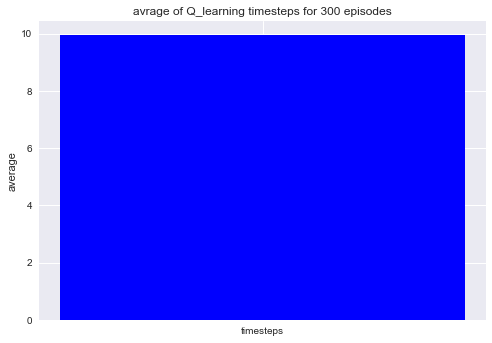

In [16]:
#graph random of timesteps using the average 
plt.style.use('seaborn')
x = ['timesteps']
q_learning_ave = [sum_of_epochs/episode]
plt.bar(x, q_learning_ave, color='blue')
plt.ylabel("average")
plt.title("avrage of Q_learning timesteps for 300 episodes")